# Time Series 2
### AR, MA, and ARMA models


### (1) AR (autoregressive) Models : Long memory

- 경제 충격이 오래 가는 시계열 모형에 적합함

- An AR(1) process is given by: $X_t = \alpha + \beta X_{t-1} + u_t$
     - In lag operator form, $(1- \beta L)X_t = \alpha+u_t$
     
- The process is stationary if $-1 < \beta < 1$.

- We can generalize from an AR(1) to an AR(p) model by simply adding additional autoregressive terms to the model.
$$\text{AR(p): } X_t = \alpha + \beta_1 X_{t-1} + \beta_2 X_{t-2} + ... + \beta_p X_{t-p} + u_t  $$
$$\rightarrow X_t = \alpha +(\beta_1 L + \beta_2 + L^2 + ... + \beta_p L^p)X_t + u_t$$
$$\rightarrow X_t = \alpha +\sum_{i=1}^{p}\beta_i X_{t-i} + u_t$$

- t기의 결과값은 t-1기의 결과값에 영향을 받는다.

### (2) MA (moving average) Models : Short memory

- 경제 충격이 비교적 짧게 가는 시계열 모형에 적합함

- A moving average process is similar to an AR process, except that the autoregression is on the error term.

- A MA(1) process is given by: $X_t = \alpha + u_t + \theta u_{t-1}$

- MA(q): $X_t = \alpha + u_t + \theta_1 u_{t-1} + \theta_2 u_{t-2} + ... + \theta_q u_{t-q}$
$$\rightarrow X_t = \alpha + (1+\theta_1 L +\theta_2 L^2 + ... + \theta_q L^q)u_t$$

### (3) Model specification
- ACF(Auto Correlation function)
- PACF(Partial Auto Correlation function)

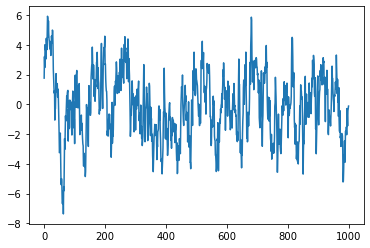

In [1]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline

ar1 = []
x_0 = 0
for i in range(1000) : 
    np.random.seed(i)
    ar1.append(0.9 * x_0 + np.random.normal())
    x_0 = ar1[-1]
plt.plot(ar1)

long-memory

$$X_t = 0.9X{t-1} + u_t$$<br>
$$X_{t-1} = 0.9X{t-2} + u_{t-1}$$<br>
$$X_{t} = 0.81X{t-2} + 0.9u_{t}$$

<Figure size 432x288 with 0 Axes>

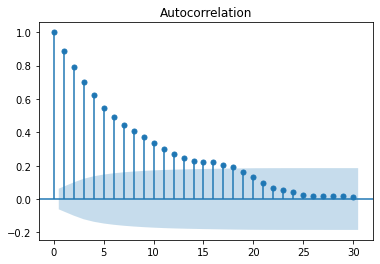

In [2]:
plt.figure()
plot_acf(np.array(ar1))
plt.show()

Short memory

<Figure size 432x288 with 0 Axes>

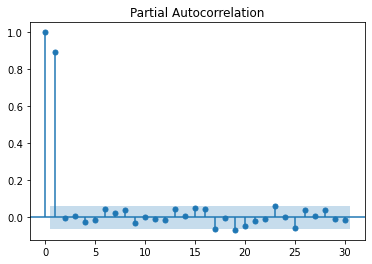

In [3]:
plt.figure()
plot_pacf(np.array(ar1))
plt.show()
# AR model의 time lag를 구하는데 매우 도움이 된다.

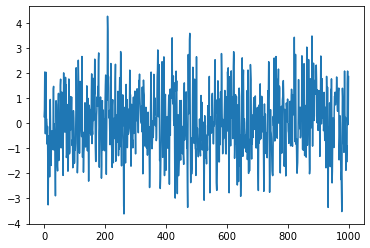

In [4]:
ma1 = []
np.random.seed(42)
errors = np.random.normal(size=1001)
for i in range(1000) : 
    ma1.append(0.8 * errors[i] + errors[i+1])
plt.plot(ma1)

short memory

<Figure size 432x288 with 0 Axes>

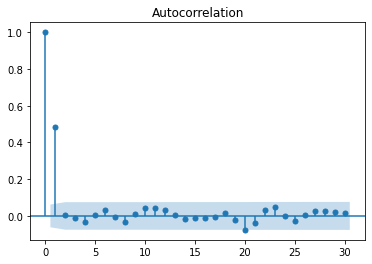

In [5]:
plt.figure()
plot_acf(np.array(ma1))
plt.show()
# ACF는 굉장히 빠르게 감소하는 경향을 보인다

<Figure size 432x288 with 0 Axes>

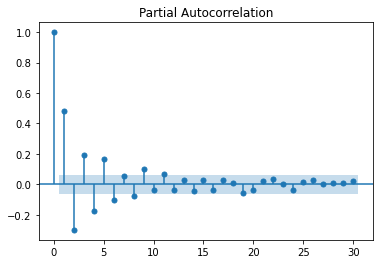

In [6]:
plt.figure()
plot_pacf(np.array(ma1))
plt.show()

- What if the process has the characteristics of both AR and MA models?

## 1. ARMA(p,q)

- AR model + MA model

An ARMA model, or Autoregressive Moving Average model, is used to describe weakly stationary stochastic time series in terms of two polynomials. The first of these polynomials is for autoregression, the second for the moving average.

- AR model과 MA model은 ARMA model의 특수한 케이스라고 보면 된다.

Often this model is referred to as the ARMA(p,q) model, where:

- p is the order of the autoregressive polynomial,
- q is the order of the moving average polynomial.

The model is given by  <br />

$$Y_t-\Phi_1Y_{t-1}-\Phi_2Y_{t-2}-...-\Phi_pY_{t-p} = \mu + e_t + \theta_1e_{t-1} + \theta_2e_{t-2} + \theta_qe_{t-q}$$  <br />

- AR에 관련된 항들은 모두 좌변에, MA에 관련된 항들은 모두 우변에 몰아넣는다

$$\rightarrow \Phi(L) Y_t = \mu + \theta(L) e_t$$  <br />
$$\Phi(L) = 1-\Phi_1L-\Phi_2L^2-...-\Phi_pL^p$$  <br />
$$\theta(L) = 1+\theta_1L+\theta_2L^2+...+\theta_qL^q$$  <br />

Example 
$$Y_t = 0.75Y_{t-1} -0.25Y_{t-2}+e_t+0.65e_{t-1}+0.35e_{t-2}$$
<center> where $p = 2$ </center>

- The equation above is AR(2)

In [7]:
import statsmodels.tsa.api as tsa

In [8]:
ar = np.array([1, -0.75, 0.25]) 
ma = np.array([1, 0.65, 0.35])
m = sm.tsa.ArmaProcess(ar, ma)
m

ArmaProcess([1.0, -0.75, 0.25], [1.0, 0.65, 0.35], nobs=100) at 0x7fea319ad880

Generate time series data from ARmaProcess

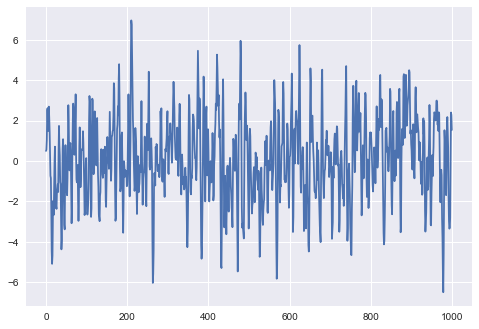

In [9]:
np.random.seed(42)
x = m.generate_sample(1000)
plt.style.use('seaborn')
plt.plot(x)
plt.show()

In [10]:
print(x) # ARMA에서 관측치 값들을 샘플링 한 것이다.

[ 4.96714153e-01  5.57135513e-01  1.02533979e+00  2.52535587e+00
  2.62018897e+00  1.48052656e+00  1.80041779e+00  2.69215683e+00
  2.15109585e+00  1.44628653e+00  2.71871233e-01 -7.34723445e-01
 -8.41968653e-01 -2.36680581e+00 -4.44847539e+00 -5.09778730e+00
 -4.69326088e+00 -2.78639237e+00 -1.97473326e+00 -2.67698463e+00
 -1.28421223e+00 -6.13239064e-02  7.08810805e-01 -9.12937478e-01
 -2.30873998e+00 -2.24490866e+00 -2.37592435e+00 -1.55434100e+00
 -1.33105739e+00 -1.16032239e+00 -1.53900853e+00  4.94900271e-01
  1.73581362e+00  7.59948385e-01  2.66316664e-01 -1.04663788e+00
 -1.14835163e+00 -2.85080832e+00 -4.37988770e+00 -3.92455794e+00
 -1.44688526e+00  6.16248530e-01  1.07811212e+00  3.38225774e-01
 -1.73057499e+00 -3.16875748e+00 -3.38994457e+00 -1.24450750e+00
  7.83629682e-01 -2.70846351e-01 -1.10066791e+00 -1.54928110e+00
 -1.70058994e+00 -8.51223990e-01  9.78395903e-01  2.76211943e+00
  1.95395499e+00  2.46180658e-01 -4.67304000e-01  6.70618862e-01
  8.90662442e-01  3.44660

Check if the model is stationary

In [11]:
print(m.isstationary) #True일 경우 안정적인 시계열이라는 뜻이다

True


Lag selection based on Information criteria $\rightarrow$ which combination of $(p,q)$ gives **the smallest error**?

In [19]:
res = sm.tsa.arma_order_select_ic(x, ic=["aic", "bic"], trend="nc")
# trend: ARMA모형에서 상수항이 들어가는지 들어가지 않는지 판단하는것
# 단기적으로 오르내릴 수 있지만, 장기적으로는 추세가 없다. (미리 시계열을 보고 눈으로 판단해 보는것이 좋다)

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [20]:
res.aic_min_order

(2, 2)

In [21]:
res.bic_min_order

(2, 2)

In [22]:
m2 = sm.tsa.ARMA(x, (2, 2))
r = m2.fit(disp=False)
print(r.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(2, 2)   Log Likelihood               -1396.986
Method:                       css-mle   S.D. of innovations              0.977
Date:                Sat, 21 May 2022   AIC                           2805.973
Time:                        14:41:50   BIC                           2835.419
Sample:                             0   HQIC                          2817.165
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0775      0.118      0.656      0.512      -0.154       0.309
ar.L1.y        0.8508      0.072     11.766      0.000       0.709       0.992
ar.L2.y       -0.3264      0.057     -5.738      0.0

In [16]:
sm.__version__

'0.12.2'

stylized fact 일반적으로 나온 데이터들의 특성 - 금융시계열 자료에서 일반적으로 나오는 특성 중 하나가 바로 Volatility Clusting이다

### ARCH/GARCH model

(1) **ARCH** (Autoregressive Conditional Heteroscedasticity)- 조건부 이산성 - models
- Volatility Clustering: Financial time series (expecially security prices) often exhibit the phenomenon of volatility clustering.
- This results in correlation in error variance over time
- ARCH models take into account such correlation or time-varying volatility.

- 한번 커진 변동성은 쉽게 줄어들지 않는다

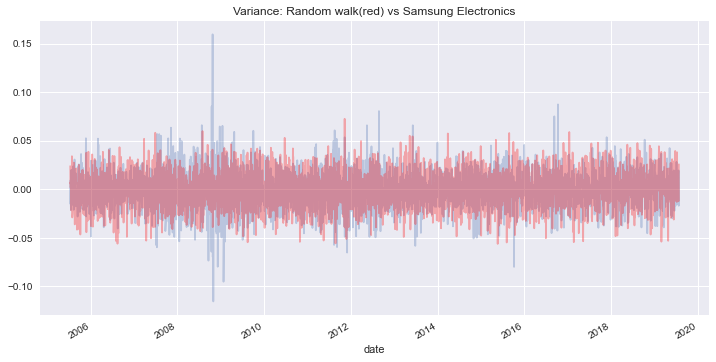

In [17]:
df = pd.read_csv('data/005930_daily.txt', sep = '\t', index_col=0, parse_dates=True)
ret = df.close.pct_change().dropna()
mock = np.random.normal(loc = np.mean(ret), scale = np.std(ret), size=len(ret))
mock = pd.Series(mock, index=ret.index)
ret.plot(figsize=(12, 6), alpha=0.3)
mock.plot(c='r', alpha=0.3)
plt.title('Variance: Random walk(red) vs Samsung Electronics');

붉은색 : 랜덤워크, 푸른색 : 삼성전자의 주가 수익률

(1-1) 
- ARCH(1)
\begin{align*}
 p_t &= \mu + p_{t-1} + \epsilon_t \\
 r_t &= \mu + \epsilon_t,  \epsilon_t\sim N(0, \sigma^2_t) \\
\sigma_t^2 &= \omega + \alpha \epsilon_{t-1}^2,  \text{where}~~ \omega, \alpha\ge0, 
                 \alpha  <1
\end{align*}
<br>
- 시간에 따라서 t 또한 변한다. 즉, 어제의 오차항의 제곱이 오늘의 오차항의 제곱에 영향을 미친다
- 시간이 지날수록 분산이 커진다
<br>
<br>
- estimation? 
    - OLS
    - MLE

(1-2) 
- ARCH(p)
$$\sigma_t^2 = \omega + \sum_{i=1}^{L} \alpha_i \epsilon_{t-i}^2$$

(1-3) 
- GARCH(1) - Generalized ARCH (모형을 단순화시킨것이다)
\begin{align*}
 p_t &= \mu + p_{t-1} + \epsilon_t \\
 r_t &= \mu + \epsilon_t,  \epsilon_t\sim N(0, \sigma^2_t) \\
\sigma_t^2 &= \omega + \alpha \epsilon_{t-1}^2  + \beta \sigma_{t-1}^2,  \text{where}~~ \omega, \alpha, \beta \ge0, 
                 \alpha +\beta <1
\end{align*}

- interpretation?
    - $\alpha$: how volatility reacts to new information
    - $\beta$: persistence of the volatility
    - $\alpha + \beta$: the rate at which the new information dies over time

In [23]:
from arch import arch_model
am = arch_model(ret) 
res = am.fit(update_freq=5)
print(res.summary())

ModuleNotFoundError: No module named 'arch'

In [ ]:
ret.kurtosis() # 첨도